In [75]:
# Если в нашей модели есть количественные предикторы, то в интерцепте мы будем иметь значение, 
#соответствующее базовому уровню категориальных предикторов и нулевому уровню количественных. 
#Это не всегда осмысленно. Например, нам не интересен прогноз для людей нулевого возраста или роста. 
#В таких ситуациях количественную переменную имеет смысл предварительно центрировать так, 
#чтобы ноль являлся средним значением переменной. Самый простой способ центрировать переменную — 
#отнять от каждого наблюдения среднее значение всех наблюдений.

#В этом задании вашей задачей будет  написать функцию centered, которая получает на вход датафрейм 
#и имена переменных, которые необходимо центрировать так, как это описано выше.
#Функция должна возвращать этот же датафрейм, только с центрированными указанными переменными

import pandas as pd
import statistics as st

x1 = input('Введите последовательность чисел через пробел: ') 
x1 = [float(i) for i in x1.split(' ')] # if i.isdigit()] # удаляет лишние пробелы и нецелые числа во введенной последовательности
del x1[6:len(x1)] # удаляет значения массива, начиная с 6 по индексу

x2 = input('Введите последовательность чисел через пробел: ') 
x2 = [float(i) for i in x2.split(' ')] # if i.isdigit()] # удаляет лишние пробелы и нецелые числа во введенной последовательности
del x2[6:len(x2)] # удаляет значения массива, начиная с 6 по индексу

x3 = input('Введите последовательность чисел через пробел: ') 
x3 = [float(i) for i in x3.split(' ')] # if i.isdigit()] # удаляет лишние пробелы и нецелые числа во введенной последовательности
del x3[6:len(x3)] # удаляет значения массива, начиная с 6 по индексу

x4 = input('Введите последовательность чисел через пробел: ') 
x4 = [float(i) for i in x4.split(' ')] # if i.isdigit()] # удаляет лишние пробелы и нецелые числа во введенной последовательности
del x4[6:len(x4)] # удаляет значения массива, начиная с 6 по индексу

# записываем данные в таблицу
df = pd.DataFrame({"X1":x1 , "X2":x2, "X3":x3 , "X4":x4  })
display(df)
x1t=[]
x2t=[]
x3t=[]
x4t=[]
for i in range(0,len(x1)):
    x1t.append(round(x1[i]-st.mean(x1),2))
    x2t.append(round(x2[i]-st.mean(x2),2))
    x3t.append(round(x3[i]-st.mean(x3),2))
    x4t.append(round(x4[i]-st.mean(x4),2))

dft= pd.DataFrame({"X1":x1t , "X2":x2t, "X3":x3t , "X4":x4t  })   
display(dft)

# или проще без этих идиотских записываний кучи переменных
df1=df - df.mean()
display(df1)


# разобрался: создаем функцию def
# говорим функции что она будет делать: брать столбцы, считать среднее в каждом и 
# вычитать из каждого элемента столбца значение среднего этого столбца
# после чего присваивать столбцу новое значение и снова записывать его в DataFrame
#def center(df, columns):
#    df[columns] = df[columns] - df[columns].mean()
#    return df
#print(center(df, columns))

#или 
# еще проще - всю таблицу перезаписывать с учетом новых значений (за вычетом среднего по каждому столбцу)
def centered(df):
    df=df - df.mean()
    return df
print(centered(df))

# числа для ввода
# 8.5 8.1 9.6 9.6 11.9
# 9.7 12.8 7.4 10.9 13.7
# 10.7 9.7 8.4 7.7 12.3
# 10.3 12.6 12.7 8 11


Введите последовательность чисел через пробел: 8.5 8.1 9.6 9.6 11.9
Введите последовательность чисел через пробел: 9.7 12.8 7.4 10.9 13.7
Введите последовательность чисел через пробел: 10.7 9.7 8.4 7.7 12.3
Введите последовательность чисел через пробел: 10.3 12.6 12.7 8 11


,X1,X2,X3,X4
0,8.5,9.7,10.7,10.3
1,8.1,12.8,9.7,12.6
2,9.6,7.4,8.4,12.7
3,9.6,10.9,7.7,8.0
4,11.9,13.7,12.3,11.0


,X1,X2,X3,X4
0,-1.04,-1.2,0.94,-0.62
1,-1.44,1.9,-0.06,1.68
2,0.06,-3.5,-1.36,1.78
3,0.06,0.0,-2.06,-2.92
4,2.36,2.8,2.54,0.08


,X1,X2,X3,X4
0,-1.04,-1.2,0.94,-0.62
1,-1.44,1.9,-0.06,1.68
2,0.06,-3.5,-1.36,1.78
3,0.06,0.0,-2.06,-2.92
4,2.36,2.8,2.54,0.08


     X1   X2    X3    X4
0 -1.04 -1.2  0.94 -0.62
1 -1.44  1.9 -0.06  1.68
2  0.06 -3.5 -1.36  1.78
3  0.06  0.0 -2.06 -2.92
4  2.36  2.8  2.54  0.08


In [80]:
# Представьте, что мы работаем в аэропорту в службе безопасности и сканируем багаж пассажиров.
#В нашем распоряжении есть информация о результатах проверки багажа за предыдущие месяцы. Про каждую вещь мы знаем:

#являлся ли багаж запрещенным - is_prohibited (No - разрешенный, Yes - запрещенный) 
#его массу (кг) - weight
#длину (см) - length
#ширину (см) - width
#тип багажа (сумка или чемодан) - type.

#Напишите функцию get_features , которая получает на вход набор данных о багаже. 
#Строит логистическую регрессию, где зависимая переменная - являлся ли багаж запрещенным, 
#а предикторы - остальные переменные,и возвращает вектор с названиями статистически значимых 
#переменных (p < 0.05) (в модели без взаимодействия). Если в данных нет значимых предикторов, функция 
#возвращает строку с сообщением  "Prediction makes no sense".

import pandas as pd
df=pd.read_csv("https://stepic.org/media/attachments/course/524/test_luggage_2.csv")
display(df.head())

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

glm_binomial= smf.glm(formula="is_prohibited ~ type + weight + length + width  ",data=df, family=sm.families.Binomial())
model = glm_binomial.fit()
model.summary()
display(model.summary())

#df.is_prohibited.value_counts() считаем разрешенное/запрещенное кол-во багажа




,is_prohibited,weight,length,width,type
0,No,89,50,6,Suitcase
1,No,69,47,6,Suitcase
2,No,79,51,22,Suitcase
3,No,74,51,26,Suitcase
4,No,75,49,17,Suitcase


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Generalized Linear Model Regression Results                              
=======================================================================================================
Dep. Variable:     ['is_prohibited[No]', 'is_prohibited[Yes]']   No. Observations:                   30
Model:                                                     GLM   Df Residuals:                       25
Model Family:                                         Binomial   Df Model:                            4
Link Function:                                           Logit   Scale:                          1.0000
Method:                                                   IRLS   Log-Likelihood:                -8.7699
Date:                                         Thu, 10 Nov 2022   Deviance:                       17.540
Time:                                                 11:09:26   Pearson chi2:                     18.1
No. Iterations:                                              7   Pseudo R-squ. (CS):             0.5514
Covariance Type:                                     nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -42.9547     34.944     -1.229      0.219    -111.443      25.534
type[T.Suitcase]     3.1343      1.400      2.238      0.025       0.390       5.879
weight              -0.2670      0.124     -2.153      0.031      -0.510      -0.024
length               1.3571      0.825      1.645      0.100      -0.260       2.974
width               -0.2710      0.162     -1.675      0.094      -0.588       0.046
====================================================================================
"""

In [11]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sf
import statsmodels.api as sm

df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_luggage_2.csv')

# Меняем значение No, Yes на 0, 1 в колонке is_prohibited
df['is_prohibited'] = np.where((df.is_prohibited == 'No'), 0, df.is_prohibited) # сначала заменили все No = 0
df['is_prohibited'] = np.where((df.is_prohibited == 'Yes'), 1, df.is_prohibited) # теперь заменили все yes =1


def get_features(df):
    # Извлекаем P-values из функции логистической регрессии. 
    #Пошагово, что происходит:
    # sf.glm() — создает модель логистической регрессии с биномиальным распределением, без взаимодействия между факторами
    #  (формула: 'is_prohibited ~ type + weight + length + width')
    # .fit() модель ищет коэффициенты, которые минимизируют различия между предсказанием и реальными значениями
    # .pvalues извлекаем P-values из таблицы с результатами. Получаем Series.
    p_val = sf.glm('is_prohibited ~ type + weight + length + width', df, 
                   family=sm.families.Binomial()).fit().pvalues
    # Удаляем строку с Intercept
    p_val = p_val.drop(labels='Intercept')
    # Переименовываем остальные строки
    p_val.index = ['type of baggage', 'weight', 'length', 'width']

    row_names = []
    row_names += [row_name for row_name, row_data in p_val.items() if row_data < 0.05]
    return row_names if len(row_names) else 'Prediction makes no sense'


display('Переменные, влияние которых значимо на запрет провоза багажа:', get_features(df))


'Переменные, влияние которых значимо на запрет провоза багажа:'

['type of baggage', 'weight']

In [9]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sf
import statsmodels.api as sm

df = pd.read_csv('https://stepic.org/media/attachments/course/524/test_luggage_2.csv')

# Меняем значение No, Yes на 0, 1 в колонке is_prohibited
df['is_prohibited'] = np.where((df.is_prohibited == 'No'), 0, df.is_prohibited) # сначала заменили все No = 0
df['is_prohibited'] = np.where((df.is_prohibited == 'Yes'), 1, df.is_prohibited) # теперь заменили все yes =1

pval = pd.DataFrame(sf.glm('is_prohibited ~ type + weight + length + width', df, 
                   family=sm.families.Binomial()).fit().pvalues)


display(pval)

pval=pval.drop(labels='Intercept') # удалить строку intercept
display(pval)


row_names = [] # создал пустой массив имен
# не понимаю эту строку
#заполняю пустой массив именами, для которых справедилво условие row_data<0.05
row_names +=[row_name for row_name, row_data in pval.items() if row_data < 0.05]

display('Переменные, влияние которых значимо на запрет провоза багажа:', row_names)

# не разобрался, можно вернуться к этому вопросу, когда изучу FOR 

,0
Intercept,0.218976
type[T.Suitcase],0.025203
weight,0.031314
length,0.100030
width,0.093925


,0
type[T.Suitcase],0.025203
weight,0.031314
length,0.100030
width,0.093925


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [55]:
# задача 5 - выявить пассажира с самым подозрительным багажом
# условие: https://stepik.org/lesson/26559/step/5?unit=8406

import pandas as pd
import numpy as np
import statsmodels.formula.api as sf
import statsmodels.api as sm

df = pd.read_csv("https://stepic.org/media/attachments/course/524/test_data_passangers.csv")
display(df.head())
# Меняем значение No, Yes на 0, 1 в колонке is_prohibited
df['is_prohibited'] = np.where((df.is_prohibited == 'No'), 0, df.is_prohibited) # сначала заменили все No = 0
df['is_prohibited'] = np.where((df.is_prohibited == 'Yes'), 1, df.is_prohibited) # теперь заменили все yes =1

df1 = pd.read_csv("https://stepic.org/media/attachments/course/524/predict_passangers.csv")
display(df1)
# Меняем значение Suitcase, Bag на 1, 0 в колонке type
df1['type'] = np.where((df1.type == 'Suitcase'), 1, df1.type) # сначала заменили все Suitcase = 1
df1['type'] = np.where((df1.type == 'Bag'), 0, df1.type) # теперь заменили все Bag =0

# создаем модель
model= sf.glm('is_prohibited ~ type + weight + length + width', df, 
              family=sm.families.Binomial()).fit()
model.summary()
display(model.summary())

# считываем коэффициенты из таблицы
est_coef = pd.DataFrame(model.params)
display('Коэффициенты:', est_coef)
intercept=est_coef[0].loc[est_coef.index[0]]
b1=est_coef[0].loc[est_coef.index[1]]
b2=est_coef[0].loc[est_coef.index[2]]
b3=est_coef[0].loc[est_coef.index[3]]
b4=est_coef[0].loc[est_coef.index[4]]

# считываем данные багажа для каждого из пассажиров из таблицы 2 (df1)
tb=df1.type
we=df1.weight
l=df1.length
wi= df1.width

powerty=[] # создаем пустой массив под значения вероятности

# считааем вероятность запрещенного багажа для каждого из пассажиров
for i in range(0, len(df1.length)):
    y= intercept + b1*tb+ b2*we + b3*l + b4*wi
    p=(np.exp(-y[i])+1)**(-1)
    powerty.append(p) # записываем все вероятности в массив

#  проверяем каждую вероятность на соответствие максимальной
for i in range(0, len(df1.length)):
    if powerty[i]== max(powerty):
        print('Проверьте еще раз пассажира ', df1.passangers[i]) # выводим имя пассажира, для которого наше уловие верно


,is_prohibited,weight,length,width,type
0,No,81,49,13,Suitcase
1,No,72,49,25,Suitcase
2,No,79,60,22,Suitcase
3,No,89,49,24,Suitcase
4,No,87,54,13,Suitcase


,weight,length,width,type,passangers
0,81,56,24,Suitcase,Bob
1,80,47,18,Bag,Anatoliy
2,76,54,20,Bag,Ivan
3,87,59,19,Bag,Polina
4,80,59,19,Suitcase,Velimir
5,70,53,21,Bag,Svetozar
6,95,54,19,Suitcase,Vsevolod
7,72,42,22,Suitcase,Nikolay
8,73,45,23,Suitcase,Martin
9,76,49,18,Bag,Poul


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Generalized Linear Model Regression Results                             
====================================================================================================
Dep. Variable:     ['is_prohibited[0]', 'is_prohibited[1]']   No. Observations:                   30
Model:                                                  GLM   Df Residuals:                       25
Model Family:                                      Binomial   Df Model:                            4
Link Function:                                        Logit   Scale:                          1.0000
Method:                                                IRLS   Log-Likelihood:                -13.701
Date:                                      Sun, 13 Nov 2022   Deviance:                       27.402
Time:                                              10:34:36   Pearson chi2:                     28.4
No. Iterations:                                           5   Pseudo R-squ. (CS):             0.3768
Covariance Type:                                  nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.8485      9.224      0.309      0.757     -15.230      20.927
type[T.Suitcase]     2.4760      1.074      2.305      0.021       0.371       4.581
weight               0.0578      0.091      0.634      0.526      -0.121       0.237
length              -0.1254      0.099     -1.264      0.206      -0.320       0.069
width               -0.1033      0.104     -0.996      0.319      -0.307       0.100
====================================================================================
"""

'Коэффициенты:'

,0
Intercept,2.848451
type[T.Suitcase],2.476006
weight,0.057797
length,-0.125409
width,-0.103319


0.888940950585741

Проверьте еще раз пассажира  Vsevolod


In [61]:
# проверка на нормальность распредления с помощью Shapiro теста 
# https://stepik.org/lesson/26559/step/6?unit=8406

#Напишите функцию normality_test, которая получает на вход dataframe с произвольным 
#количеством переменных разных типов (количественные, строки, факторы) и проверяет 
#нормальность распределения количественных переменных. 
#Функция должна возвращать вектор значений p-уровней значимости теста shapiro.test для каждой количественной переменной
#Распределение будем считать значимо отклонившимся от нормального, если в тесте shapiro.test() p < 0.05.

from scipy.stats import shapiro
import pandas as pd
import numpy as np

df=pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')
display(df)


def norm_test(df):
  df_n = df.select_dtypes(include=np.number) # тут мы отсекли столбцы, в которых не содержится чисел (V2 , V4)
  df_s = df_n.apply(shapiro, axis=0)  # тут применили тест Shapiro
  return  df_s.iloc[1]

display(norm_test(df)) # тут выводим уровень значимости теста 

,V1,V2,V3,V4,V5,V6
0,10.03,s,9.35,s,9.91,11.23
1,12.45,x,11.61,x,10.07,6.41
2,9.97,a,7.02,a,8.85,11.38
3,10.53,f,12.24,f,7.22,8.71
4,6.59,b,7.72,b,14.31,10.08
5,7.26,j,12.19,j,10.75,11.71
6,6.97,g,7.80,g,9.91,6.99
7,11.99,o,10.98,o,6.04,11.38
8,9.39,k,9.86,k,9.94,11.14
9,13.58,z,11.12,z,6.58,11.58


V1    0.568211
V3    0.245836
V5    0.314189
V6    0.009374
Name: 1, dtype: float64

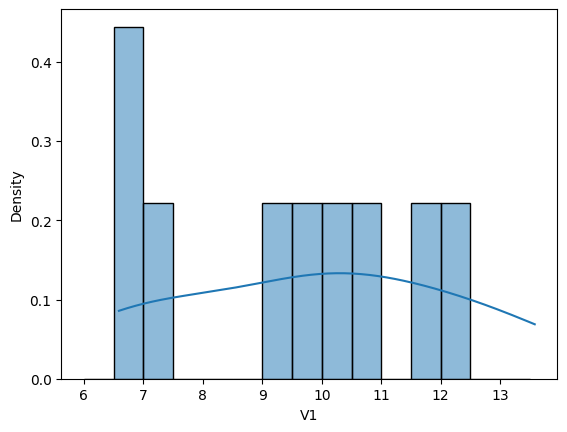

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

df=pd.read_csv('https://stepic.org/media/attachments/course/524/test.csv')

g=sns.histplot(df.V1, kde=True, stat="density", bins=np.arange(6, 14, .5))
# параметр bins дает задать диапазон для значений (6.3 ; 11.7) с шагом 0,01

#for ax in g.axes.flat:
#    ax.xaxis.set_major_locator(MultipleLocator(0.1))
plt.show()



In [11]:
# отвлечемся) эта штука заполняет массив в диапазоне от 0 до 1 с шагом 0.01
# вдруг пригодится
import pandas as pd
import numpy as np
xs = np.arange(0., 1., .01)
print(xs)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [63]:

from scipy.stats import shapiro
import pandas as pd
import numpy as np

df= pd.read_csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")
display(df)

dfA=df[df.y=='A'] # выбираем только таблицу, где в колонке y есть определенное значение - A
dfA=dfA.drop(columns='y')
dfA.rename(columns={'x':'xA'},inplace =True)


dfB=df[df.y=='B'] 
dfB=dfB.drop(columns='y')
dfB.rename(columns={'x':'xB'},inplace =True)

dfC=df[df.y=='C'] 
dfC=dfC.drop(columns='y')
dfC.rename(columns={'x':'xC'},inplace =True)


df_t= pd.DataFrame(dfA.xA,dfB.xB,dfC.xC) 
#display(df_t)






,x,y
0,1.08,A
1,0.07,A
2,-1.02,A
3,-0.45,A
4,0.81,A
5,-1.27,A
6,-0.75,A
7,1.47,A
8,-0.20,A
9,-1.48,A


20   -1.60
21   -1.08
22    0.59
23    0.36
24    1.72
25    0.80
26   -0.09
27   -0.78
28    0.26
29    0.15
Name: xC, dtype: float64


In [121]:
# проверям распределения на нормальность и на гомогенность дисперсий в группах
# https://stepik.org/lesson/26559/step/7?unit=8406

from scipy.stats import shapiro
from scipy.stats import bartlett
import pandas as pd
import numpy as np
from statistics import pvariance 
from statistics import variance 

df= pd.read_csv("https://stepic.org/media/attachments/course/524/s_anova_test.csv")
#display(df)


xA=[]
xB=[]
xC=[]
for i in range(0, len(df.x)):
    if df.y[i]=='A':
        xA.append(df.x[i])
    elif df.y[i]=='B':
        xB.append(df.x[i])
    else: xC.append(df.x[i])

df_t= pd.DataFrame({'xA':xA,'xB':xB, 'xC':xC})
display(df_t)

# проверям на нормальность распределения    
def norm_test(df_t):
  
  df_n = df_t.apply(shapiro, axis=0)  # тут применили тест Shapiro для каждого из столбцов(axis=0) и перезаписали таблицу
                                    # apply добавило новый столбец со значением теста shapiro
  return  df_n.iloc[1] # тут функция возвращает таблицу со значениями из строки 1 (там записаны p.value)
display('p-val для нормальности распределений', norm_test(df_t)) # выводим p-values (если больше 0.05, значит нормальное распределение)

df_v = df_t.apply(variance, axis=0) # считаем дисперсию для каждого столбца
display('дисперсии для каждой из групп', df_v)

p_bartlett = bartlett(xA,xB,xC)
print('Тест Бартлетта, значение p-val для сравнения дисперсий групп', p_bartlett) # если больше 0.05 значит дисперсии гомогенны


,xA,xB,xC
0,1.08,-1.17,-1.60
1,0.07,-3.40,-1.08
2,-1.02,-1.46,0.59
3,-0.45,-0.65,0.36
4,0.81,0.52,1.72
5,-1.27,-1.91,0.80
6,-0.75,-0.08,-0.09
7,1.47,-0.50,-0.78
8,-0.20,0.17,0.26
9,-1.48,0.90,0.15


'p-val для нормальности распределений'

xA    0.598952
xB    0.741496
xC    0.922552
Name: 1, dtype: float64

'дисперсии для каждой из групп'

xA    1.037138
xB    1.639018
xC    0.944246
dtype: float64

Тест Бартлетта, значение p-val для сравнения дисперсий групп BartlettResult(statistic=0.778097730899806, pvalue=0.677701153033097)


In [108]:
# задача выше - решение других людей
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

data = pd.read_csv(r'https://stepic.org/media/attachments/course/524/s_anova_test.csv')

def smart_anova(data):
    # сначала разделим данные (группа А, группа В, группа С)
    group_names = data.groupby(['y']).mean().index # вырвали значения столбца Y - A,B, C
    all_samples = [data.x[data.y == group_name] for group_name in group_names] # вырвали значения столбца Х для
                                                                                #значений А, В и С
    
    # если дисперсии негомогенны, функция сравнивает группы при помощи критерия Краскела — Уоллиса
    t_statistic, p_bartlett = bartlett(*all_samples) # проверяем гомогенность тестом Бартлетта (считаем p-уровень 
                                                    #значимости для сравнения дисперсий в группах)
    if p_bartlett < 0.05: # если он меньше 0.05, то дисперсии НЕГОМОГЕННЫ (не равны друг другу), а значит можно
                            #применить к сравнению групп тест  Краскелла-Уоллиса
        return {'KW' : kruskal(*all_samples).pvalue}
    
    # Если хотя бы в одной группе распределение отличается от нормального - критерий Краскела — Уоллиса
    # для каждой группы отдельно находим p_value
    p_shapiro_values = [shapiro(data.x[data.y == group_name].values).pvalue for group_name in group_names]
    for p in p_shapiro_values:
        if p < 0.05:
            return {'KW' : kruskal(*all_samples).pvalue}
    
    # ИНАЧЕ - при помощи дисперсионного анализа One-way ANOVA
    return {'ANOVA' : [f_oneway(*all_samples).pvalue]}

smart_anova(data)

# выводит результат сравнения равенства групп - значение p-values
# если оно больше 0.05, то значит верна нулевая гипотеза - средние значения генеральных совокупностей групп равны между собой
# значит эти значения принадлежат одной генеральной совокупности


{'ANOVA': [0.26529804467380746]}

In [116]:
# еще одно решение сравнения нормальности распределния и гомогенности дисперсий

from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import f_oneway

df= pd.read_csv('https://stepic.org/media/attachments/course/524/s_anova_test.csv')

def norm_test(df):
  df_s = np.apply_along_axis(shapiro, 0, df)[1]
  return df_s

def homog_test(df):
  ps = bartlett(*df.T)
  return round(ps[1],3)

def kruskal_test(df):
  ps = kruskal(*df.T)
  return round(ps[1],3)

def anova_test(df):
  ps = f_oneway(*df.T)
  return round(ps[1],3)

def smart_anova(df, need_pivot=True):
  # Pivoting
  if need_pivot:
    df["count"] = df.groupby('y').cumcount()
    df = np.array(df.pivot(columns="y", values="x", index="count"))
  else:
    df = np.array(df)
  if ((norm_test(df) < 0.05).any()) or (homog_test(df) < 0.05):
    print("non-parametric")
    return {"KW": kruskal_test(df)}
  print("parametric")
  return {"ANOVA": anova_test(df)}

display(smart_anova(df))

parametric


{'ANOVA': 0.265}

ShapiroResult(statistic=0.9062056541442871, pvalue=0.21976825594902039)
ShapiroResult(statistic=0.9439294934272766, pvalue=0.6238170862197876)
ShapiroResult(statistic=0.8892548680305481, pvalue=0.196036234498024)
ShapiroResult(statistic=0.8537927865982056, pvalue=0.047822609543800354)


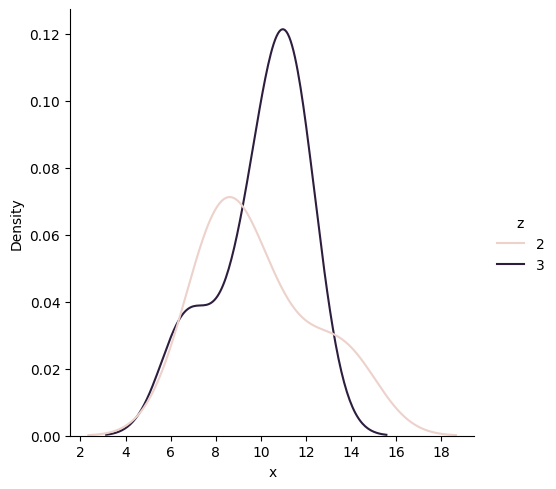

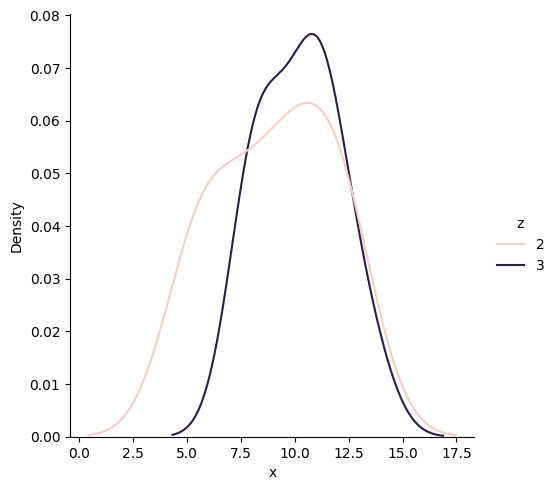

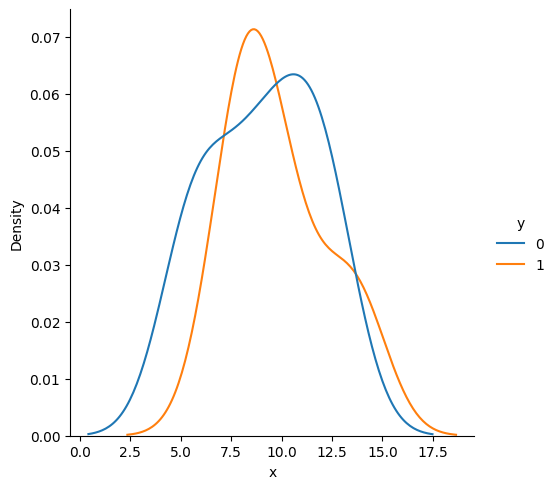

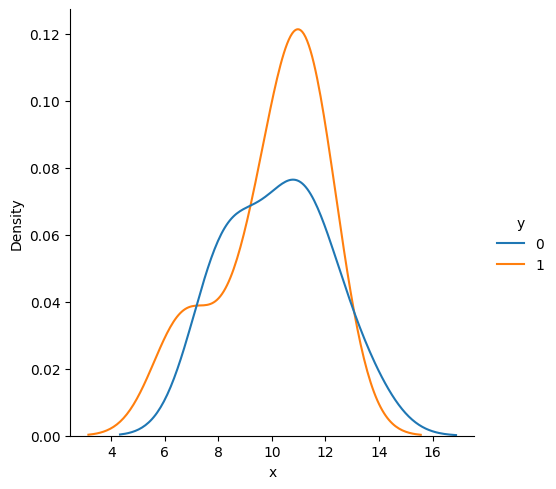

In [163]:
from scipy.stats import shapiro
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")


y0z2=[] # 1 группа:  y=0, z=2
y0z3=[] # 2 группа:  y=0, z=3
y1z2=[] # 3 группа:  y=1, z=2
y1z3=[] # 4 группа:  y=1, z=3
for i in range(0, len(df.x)):
    if df.y[i]==1 and df.z[i]==2:
        y1z2.append(df.x[i])
    elif df.y[i]==0 and df.z[i]==2:
        y0z2.append(df.x[i])
    elif df.y[i]==1 and df.z[i]==3:
        y1z3.append(df.x[i])
    else: y0z3.append(df.x[i])

# делаем тест Shapiro для каждой группы 1-4
shap3=shapiro(y1z2)
shap1=shapiro(y0z2)
shap4=shapiro(y1z3)
shap2=shapiro(y0z3)
print(shap1)
print(shap2)
print(shap3)
print(shap4)

sns.displot(x='x', data=df[df.y==1], hue="z", kind="kde")
plt.show()

sns.displot(x='x', data=df[df.y==0], hue="z", kind="kde")
plt.show()

sns.displot(x='x', data=df[df.z==2], hue="y", kind="kde")
plt.show()

sns.displot(x='x', data=df[df.z==3], hue="y", kind="kde")
plt.show()

In [142]:
# Напишите функцию normality_by, которая принимает на вход dataframe c тремя переменными. 
#Первая переменная количественная, вторая и третья имеют две градации и разбивают наши наблюдения на группы. 
#Функция должна проверять распределение на нормальность в каждой получившейся группе и возвращать dataframe с результатами 
#применения теста ﻿ shapiro.test ﻿﻿
# https://stepik.org/lesson/26559/step/8?unit=8406

from scipy.stats import shapiro
import pandas as pd

df=pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")

def norm_test(df):
  # pivoting
  df["yz"] = df["y"].astype("str") + df["z"].astype("str") 
  df["count"] = df.groupby("yz").cumcount()
  df = df.pivot(columns="yz", values="x", index="count")
  # easier with numpy
  arr = np.array(df)
  result = {}
  for column, group in zip(arr.T, df.columns):
    # for correct shapito test have to remove None values from pivoting
    result[group] = shapiro(column[~np.isnan(column)])[1]
  return pd.Series(result)

display(norm_test(df))

02    0.219768
03    0.623817
12    0.196036
13    0.047823
dtype: float64

In [145]:
from scipy.stats import shapiro
import pandas as pd

df=pd.read_csv("https://stepic.org/media/attachments/course/524/test_for_norm.csv")
df.groupby(['y', 'z'], as_index=False).agg(lambda x: shapiro(x)[1]).rename(columns={'x':'p-value'})

,y,z,p-value
0,0,2,0.219768
1,0,3,0.623817
2,1,2,0.196036
3,1,3,0.047823


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


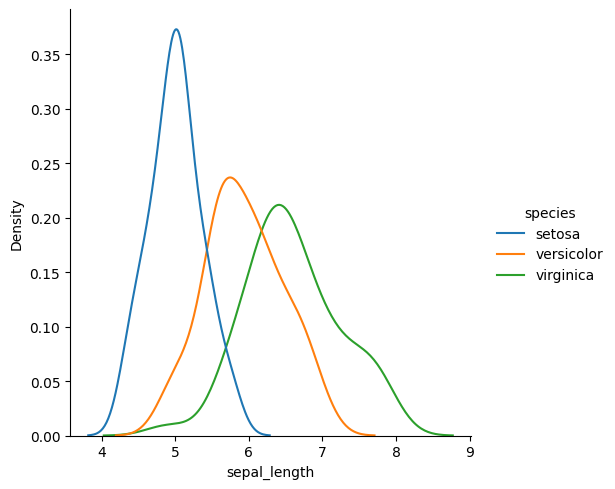

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt


data = sns.load_dataset("iris")
display(data)
sns.displot(x='sepal_length', data=data, hue="species", kind="kde")
plt.show()

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_60346/596654198.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[y==i], hist = False, kde = True,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_60346/596654198.py:11: UserWarning: 

`distplot` is a deprecated function and will be remove

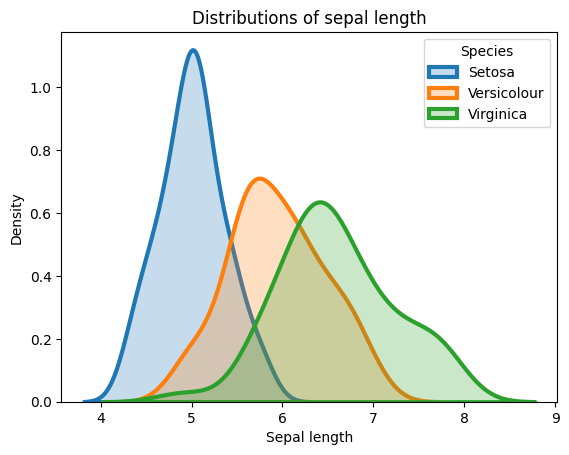

In [150]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
X = iris.data[:, :1]  # sepal length
y = iris.target
labels = ["Setosa", "Versicolour", "Virginica"]

for i in range(3):
  sns.distplot(X[y==i], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label=labels[i])
plt.xlabel("Sepal length")
plt.ylabel("Density")
plt.title("Distributions of sepal length")
plt.legend(title="Species");